In [38]:
#导入需要的包
import pandas as pd
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
import numpy as np

In [39]:
data = pd.read_csv('Advertising.csv')
#展示前5列数据
data.head() 

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [40]:
data.shape

(200, 5)

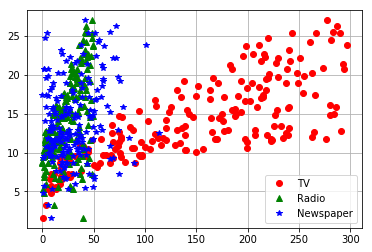

In [41]:
path = 'Advertising.csv'
data = pd.read_csv(path)
x = data[['TV','Radio','Newspaper']]
y = data['Sales']
plt.plot(data['TV'],y,'ro',label='TV')
plt.plot(data['Radio'],y,'g^',label='Radio')
plt.plot(data['Newspaper'],y,'b*',label='Newspaper')
plt.legend(loc='lower right')
#显示网格线
plt.grid() 
plt.show()

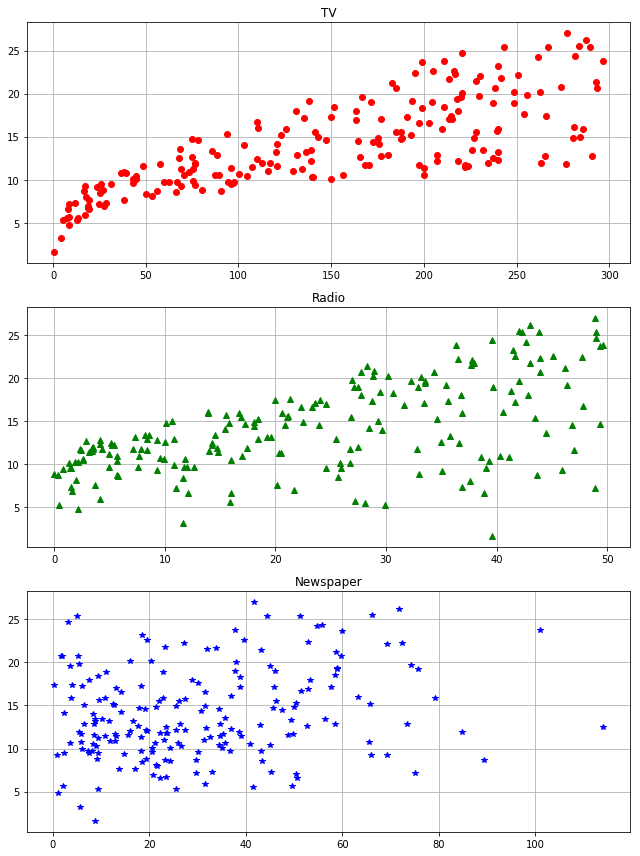

In [42]:
#指定图像的大小
plt.figure(figsize=(9,12))
#画3x1的子图，并占据第一个
plt.subplot(311)
plt.plot(data['TV'], y, 'ro')
plt.title('TV')
plt.grid()
#并占据第二个
plt.subplot(312)
plt.plot(data['Radio'], y, 'g^')
plt.title('Radio')
plt.grid()
#并占据第三个
plt.subplot(313)
plt.plot(data['Newspaper'], y, 'b*')
plt.title('Newspaper')
plt.grid()
plt.tight_layout()
plt.show()

In [51]:
#构建X（特征向量）和y（标签列）
feature_cols = ['TV','Radio','Newspaper']
X = data[feature_cols]
y = data['Sales']
print(X.head())
print(type(X))
print(type(y))
print(X.shape)
print(y.head())

      TV  Radio  Newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(200, 3)
0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64


In [44]:
#sklearn的线性回归
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.4, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
linreg = LinearRegression()
#训练成y=Wx+b的形式
model = linreg.fit(X_train,y_train)
print(model)
#打印偏置值b
print("b", linreg.intercept_)
#打印权值W
print("W",linreg.coef_)
#将权值和x进行结合
zip(feature_cols, linreg.coef_)

(120, 3)
(80, 3)
(120,)
(80,)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
b 3.0753828167052237
W [0.04475753 0.18434893 0.00279513]


In [45]:
#预测
y_pred = linreg.predict(X_test)
print(y_pred)
#评价测度
print(type(y_pred),type(y_test))
print(y_pred.shape,y_test.shape)
print(len(y_pred),len(y_test))
sum_mean = 0
for i in range(len(y_pred)):
    sum_mean += (y_pred[i] - y_test.values[i])**2
print("回归均方误差：",np.sqrt(sum_mean/len(y_pred)))

[21.75935389 16.33809031  7.63745109 17.53818323 18.44533055 23.69631164
 16.35757645 13.32174877  9.29888886 17.22778955 14.42337872 10.00290799
 17.12037969 16.94530844 14.85121973 15.72525459 12.45868165 16.86598652
 11.43677858 17.97008288  9.34885119 13.17575947  9.05759361 10.49369368
 11.44407166 14.91597281 10.02465801 19.27092122 18.29365658 16.96430184
 21.51490518 14.43483768 16.35517797 12.22942505 19.81723254 15.28387086
 13.69286047 10.00528399 20.94776128  7.70556117  3.80700147  7.24161546
  6.20837682 18.40405093  8.69803622 14.12749368 15.29938376 20.31949892
 20.61959811 19.50910564 23.98271026 14.99816755  6.95559327 19.92910294
 18.65080035 12.3799137  13.92697437  6.30517479 15.07332437  9.83189417
 12.01337633 12.01167681  8.85538071 21.32769068 23.12633826 12.68907096
  6.69065209 17.9661496  16.29648425  9.026378   20.18687816 20.65259527
 24.07534345 10.52786144 10.86843723 16.28405732 10.79545876  6.68370536
 21.23587157 14.4693085 ]
<class 'numpy.ndarray'> <

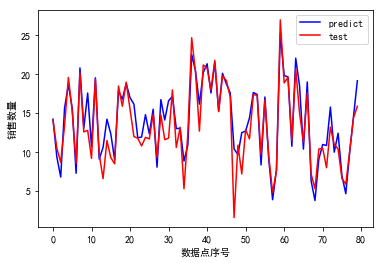

In [54]:
#作图
plt.figure()
plt.plot(range(len(y_pred)), y_pred, 'b', label="predict")
plt.plot(range(len(y_test)), y_test, 'r', label="test")
plt.legend(loc="upper right")
#以下两句解决中文标签不能显示的问题
plt.rcParams['font.sans-serif'] = ['simHei']
plt.rcParams['axes.unicode_minus'] = False
plt.xlabel("数据点序号")
plt.ylabel("销售数量")
plt.show()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
b 3.095202944660505
W [0.04729317 0.18405182]
回归均方误差： 2.10848039453505


Text(0, 0.5, 'Num of Sales')

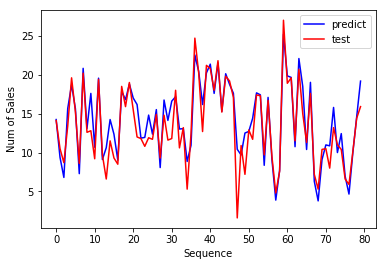

In [50]:
#去掉Newspaper后再进行预测
feature_cols = ['TV','Radio']
X = data[feature_cols]
y = data['Sales']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.4, random_state=2)
linreg = LinearRegression()
model = linreg.fit(X_train,y_train)
print(model)
print("b", linreg.intercept_)
print("W",linreg.coef_)
zip(feature_cols, linreg.coef_)
y_pred = linreg.predict(X_test)
sum_mean = 0
for i in range(len(y_pred)):
    sum_mean += (y_pred[i] - y_test.values[i])**2
print("回归均方误差：",np.sqrt(sum_mean/len(y_pred)))
plt.figure()
plt.plot(range(len(y_pred)), y_pred, 'b', label="predict")
plt.plot(range(len(y_test)), y_test, 'r', label="test")
plt.legend(loc="upper right")
plt.xlabel("Sequence")
plt.ylabel("Num of Sales")